<a href="https://colab.research.google.com/github/Sangrok-NA/Sangrok-NA/blob/main/X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader

In [14]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [15]:
!ls

COVID19  model.pth  NORMAL


In [16]:
cd /content/drive/MyDrive/archive/chest_xray/train/

/content/drive/MyDrive/archive/chest_xray/train


In [17]:
!ls

COVID19  model.pth  NORMAL


In [18]:
!ls -a

COVID19  model.pth  NORMAL


In [19]:
rm -rf .ipynb_checkpointsls -a

rm: invalid option -- 'a'
Try 'rm --help' for more information.


In [20]:
trans = transforms.Compose([
    transforms.Resize((64,128))
])

train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/archive/chest_xray/train', transform=trans)

In [24]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('/content/drive/MyDrive/archive/chest_xray/train/NORMAL/%d_%d.jpeg'%(num, label))
    else:
        data.save('/content/drive/MyDrive/archive/chest_xray/train/COVID19/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11B7BD0> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11B7750> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11B8850> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11B7CD0> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11B7AD0> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA0D0> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA390> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA3D0> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA210> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA610> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA4D0> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA390> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA590> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B11CA550> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FE4B1

KeyboardInterrupt: ignored

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

trans = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/archive/chest_xray/train', transform=trans)

In [ ]:
data_loader = DataLoader(dataset = train_data, batch_size = 8, shuffle = True, num_workers=2)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.layer3(out)
        return out

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
net = CNN().to(device)
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

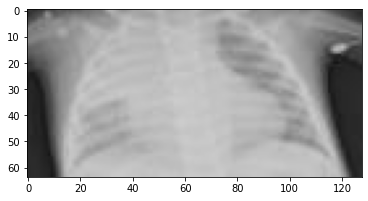

In [ ]:
imshow(data)

In [ ]:
%matplotlib inline
import numpy as np
import PIL

In [ ]:
total_batch = len(data_loader)

epochs = 10
for epoch in range(epochs):
    avg_cost = 0.0
    for num,data in enumerate(data_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!') 

In [ ]:
torch.save(net.state_dict(), "/content/drive/MyDrive/archive/chest_xray/train/model.pth")

In [ ]:
new_net = CNN().to(device)

In [ ]:
new_net.load_state_dict(torch.load('/content/drive/MyDrive/archive/chest_xray/train/model.pth'))

<All keys matched successfully>

In [ ]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([-0.1072, -0.0143, -0.0317, -0.0339,  0.0807],
       grad_fn=<SelectBackward0>)
tensor([-0.1072, -0.0143, -0.0317, -0.0339,  0.0807],
       grad_fn=<SelectBackward0>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])

In [ ]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/archive/chest_xray/test', transform=trans)

test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 0.375
